In [10]:
import numpy as np 
import pandas as pd 
import sklearn
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'C:\Users\hsiun\OneDrive\tf_gpu_wsl\analysis_20230808\baz_greater_than1.csv',encoding = 'ISO-8859-1')
heights = df['Height']
df.set_index('age')

,ID,Max_age,Min_age,Origin_BMIclass,Origin_BAZ,Final_BMIclass,Final_BAZ,Height,@4.DateofBirth,sex,...,@80.100kHzLLImpedance,@81.GrowthScore,@82.ObesityDegreeofaChild,@83.LowerLimitObesityDegreeofaChildNormalRange,@84.UpperLimitObesityDegreeofaChildNormalRange,@88.InBodyType,@89.LocalID,PrimaryFirst,MatchSequence,@1.Name
age,,,,,,,,,,,,,,,,,,,,,
11.0,1001104602,12.4,11.0,4,3.13,4,2.65,147.0,10/24/2003,1,...,223.5,49,151,90,110,230,68,1,1,¶À¬f»¨
11.6,1001104602,12.4,11.0,4,3.13,4,2.65,150.0,10/24/2003,1,...,206.5,43,154,90,110,230,68,0,2,¶À¬f»¨
12.4,1001104602,12.4,11.0,4,3.13,4,2.65,158.0,10/24/2003,1,...,225.6,64,138,90,110,230,68,0,3,¶À¬f»¨
11.5,1001105601,12.6,11.5,4,2.25,4,2.58,152.3,9/12/2004,1,...,213.7,76,123,90,110,230,97,1,1,³¯«Ø»¨
12.0,1001105601,12.6,11.5,4,2.25,4,2.58,156.7,9/12/2004,1,...,214.9,75,124,90,110,230,97,0,2,³¯«Ø»¨
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12.3,19107107,12.3,10.4,3,1.38,3,1.61,158.0,12/1/2006,2,...,256.6,75,112,90,110,230,31,0,5,·¨´fÚô
10.5,20111110,12.6,10.5,3,1.76,3,1.89,143.9,9/16/2010,2,...,222.3,81,125,90,110,230,42,1,1,Ä¬²ú½{
11.1,20111110,12.6,10.5,3,1.76,3,1.89,147.9,9/16/2010,2,...,237.2,73,125,90,110,230,42,0,2,Ä¬²ú½{


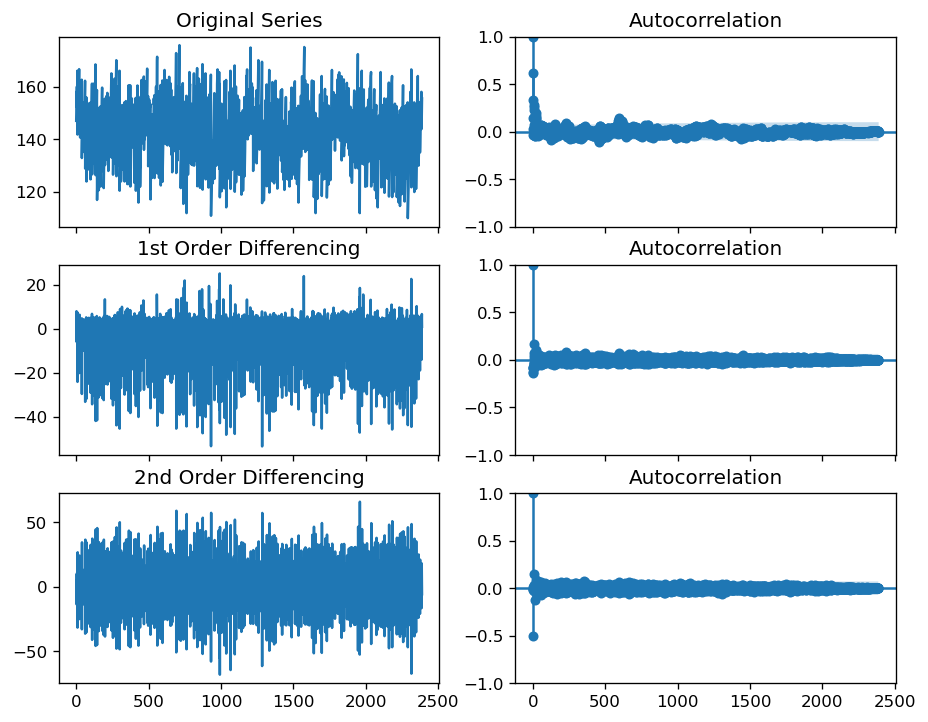

In [3]:
import numpy as np 
import pandas as pd 
import sklearn
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'C:\Users\hsiun\OneDrive\tf_gpu_wsl\analysis_20230808\baz_greater_than1.csv',encoding = 'ISO-8859-1')

'''
## acf plot 
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data : Internet Usage per Minute
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Height']); axes[0, 0].set_title('Original Series')
plot_acf(df['Height'], ax=axes[0, 1], lags=np.arange(len(df)))
# 1st Differencing
axes[1, 0].plot(df['Height'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Height'].diff().dropna(), ax=axes[1, 1], lags=np.arange(len(df)-1))
# 2nd Differencing
axes[2, 0].plot(df['Height'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Height'].diff().diff().dropna(), ax=axes[2, 1], lags=np.arange(len(df)-2))
plt.show()
'''

In [8]:
import numpy as np 
import pandas as pd 
import sklearn
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'C:\Users\hsiun\OneDrive\tf_gpu_wsl\analysis_20230808\baz_greater_than1.csv',encoding = 'ISO-8859-1')
print(f"Total samples:{len(df)}")
print(df.head(2389))
print(df)

Total samples:2389
              ID  Max_age  Min_age  Origin_BMIclass  Origin_BAZ  \
0     1001104602     12.4     11.0                4        3.13   
1     1001104602     12.4     11.0                4        3.13   
2     1001104602     12.4     11.0                4        3.13   
3     1001105601     12.6     11.5                4        2.25   
4     1001105601     12.6     11.5                4        2.25   
...          ...      ...      ...              ...         ...   
2384    19107107     12.3     10.4                3        1.38   
2385    20111110     12.6     10.5                3        1.76   
2386    20111110     12.6     10.5                3        1.76   
2387    20111110     12.6     10.5                3        1.76   
2388    20111110     12.6     10.5                3        1.76   

      Final_BMIclass  Final_BAZ  Height @4.DateofBirth  sex  ...  \
0                  4       2.65   147.0     10/24/2003    1  ...   
1                  4       2.65   150.0 